# The Normal Distribution, Standard Normal Distribution, Standard Scores, and One-Sample z-tests

# Normal distribution 


## What are the parameters that characterize the normal distribution?

A: The normal distribution is characterized by two parameters, $\mu$ and $\sigma$, which correspond to the mean of the distribution and the standard deviation of the distribution, respectively. 

* The mean, $\mu$, is a measure of the central tendency of the distribution
* The standard deviation $\sigma$ measures the spread of the data about this mean. 

## What is the empirical rule? 

A: The empirical rule states that 68% of the data in a normal distribution is to be found 1 standard deviation away from the mean, 95% of the data is found within 2 standard deviations from the mean, and 99.7% of the data can be found within 3 standard deviations from the mean. The empirical rule is also known as the 68-95-99.7 rule for this reason.

## Next, let's create a normal distribution with `numpy` and visualize it

Use `numpy` to create a normal distribution containing 3000 values with mean $\mu = 20$ and standard deviation $\sigma = 0.5$

In [3]:
import numpy as np

mu, sigma = 20, 0.5
n = 3000

s = np.random.normal(mu, sigma, n)

Create a normalized histogram for this distribution using `matplotlib`. Set bins = 20. Make sure to get the bin positions and counts for each of the obtained bins.

/Users/josephkholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


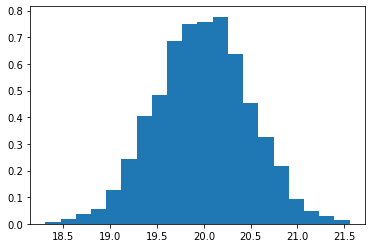

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 

n, bins, _ = plt.hist(s, bins=20, normed=True)

Calculate the density function with $\mu$, $\sigma$, and the bin information obtained before.

In [5]:
density = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

Plot the normalized histogram (set bins = 20) along with the density function

/Users/josephkholodenko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


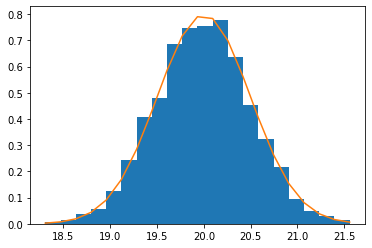

In [6]:
plt.hist(s, bins=20, normed=True)
plt.plot(bins, density)

Use seaborn to visualize the distribution and plot the KDE

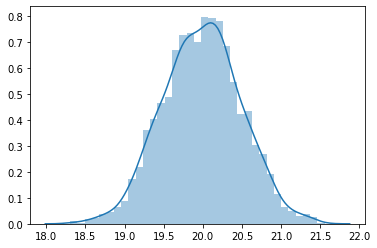

In [7]:
import seaborn as sns
sns.distplot(s, kde=True)

# Standard normal distributions 

## Compare and contrast the normal distribution and the standard normal distribution. What is the empirical rule for the standard normal distribution? 

A: The standard normal distribution is a special case of the normal distribution. It is a normal distribution with a mean of 0 and standard deviation of 1. 

The empirical rule for the standard normal distribution is as follows: 
* 68% of the area under the standard normal distribution lies between -1 and 1 
* 95% of the area under the standard normal distribution lies between -2 and 2
* 99.7% of the area under the standard normal distribution lies between -3 and 3

## How do you standardize a normal distribution? 

A: To standardize normally distributed data you first subtract the mean of the data from each point and then divide this difference by the data's standard deviation. 

## Standardize the distribution you created above and use seaborn to visualize the distribution and plot the KDE

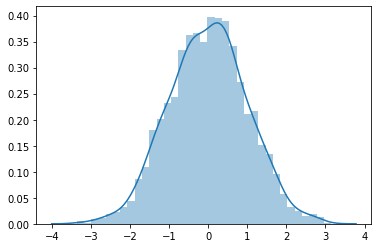

In [8]:
standard_s = (s - np.mean(s))/np.std(s)
sns.distplot(standard_s, kde=True)

# Standard score (z-score)

## Why is the standard score a useful statistic? 

> The z-score tells us how many standard deviations above or below the mean an observation is. Calculating the z-score allows us to understand how extreme a certain result is. 

> The z-score allows us to compute the probability of a score occurring in a normal distribution and it allows us to compare scores from different normal distributions. 

## Let's use a real-world dataset. 

Let's look at Combined Cycle Power Plant dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant). The dataset contains 9568 observations collected from a combined cycle power plant over a period of six years. Features in the dataset consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V), and the net hourly electrical energy output (EP) of the plant. 

We'll look at the ambient pressure (AP) variable, which is measured in units of millibars. 

Let's start by loading the data into a `pandas DataFrame` and inspecting the first five rows of the dataframe.

In [9]:
# Load the data into a dataframe 
import pandas as pd 
df = pd.read_excel('Folds5x2_pp.xlsx')
# Inspect the first five rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Use seaborn to visualize the distribution of the ambient pressure (`AP`) feature. Plot the KDE. 

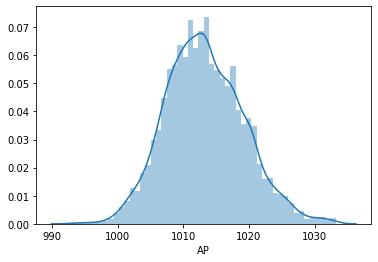

In [10]:
sns.distplot(df['AP'], kde=True)

**What is the mean ambient pressure? What is the standard deviation of the ambient pressure?**

In [11]:
mu = df['AP'].mean()
sigma = df['AP'].std()

mu, sigma

(1013.2590781772603, 5.938783705811591)

Standardize the ambient pressure and use seaborn to visualize the standardized distribution of the ambient pressure (set `kde = True`). 

What are the mean and standard deviation of standardized distribution of the ambient pressure?  

mean: -0.0
standard deviation: 1.0


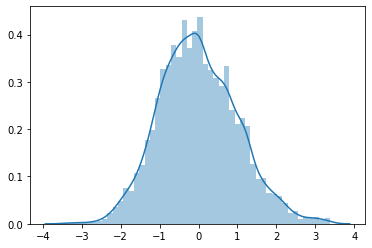

In [12]:
ambient_pressure = df['AP'].values
standardized_ambient_pressure = (ambient_pressure - mu)/sigma

sns.distplot(standardized_ambient_pressure, kde=True)

print("mean:", round(np.mean(standardized_ambient_pressure)))
print("standard deviation:", round(np.std(standardized_ambient_pressure)))

**What is the z-score corresponding to an observed ambient pressure of 1025 millibars? Interpret the result.** 

In [13]:
def get_zscore(value, mean, std):
    return (value-mean)/std

get_zscore(1025, mu, sigma)

1.976990980703709

> The standard score corresponding to an observation of 1025 millibars is 1.98. The observed ambient pressure is almost 2 standard deviations above the mean ambient pressure. 

**Suppose an observation of ambient pressure has a z-score of -2. Interpret this z-score. What is the observed ambient pressure?**

In [14]:
def get_value_from_zscore(z, mean, std):
    return z*std + mean

get_value_from_zscore(-2, mu, sigma)

1001.3815107656371

> The observed ambient pressure is 2 standard deviations below the mean ambient pressure. A standard score of -2 corresponds to an ambient pressure of 1001.4 millibars. 

# Statistical Testing with z-scores and p-values 

## What makes a sample representative of a population? 

> A sample is representative of a population when it accurately reflects the members of the entire population. 

## What is the probability of a z-score being less than 0? 

Hint: Look at the image below.

<img src="images/cumprob.png" width="500">



> The probability of a z-score being less than 0 is 50%. This is half of the area under the standard normal distribution. 

In [15]:
import scipy.stats as stats
print(stats.norm.cdf(0))

0.5


## Let's go back to the Combined Cycle Power Plant dataset

Assume that the combined cycle power plant dataset represents data that spans all the time period the plant was operational.  

**What is the probability of observing an ambient pressure less than 1001.4 millibars?**

In [16]:
mu, sigma = df['AP'].mean(), df['AP'].std()

z = get_zscore(1001.4, mu, sigma)

print(stats.norm.cdf(z))

0.022918746328381638


> The probability of observing an ambient pressure less than 1001.4 millibars is 2.3%. 

**What is the probability of observing an ambient pressure greater than or equal to 1010 millibars?**

In [17]:
z = get_zscore(1010, mu, sigma)

print(1 - stats.norm.cdf(z))

0.7084213454318429


> The probability of observing an ambient pressure greater than or equal to 1010 millibars is 70.8%.

## What is a statistical hypothesis? What is hypothesis testing?

A statistical hypothesis is an assumption about a population parameter. There two types of statistical hypothesis: null and alternative hypotheses. We set up a hypothesis to be tested through data analysis.

Hypothesis testing is the process through which statistical hypotheses are accepted or rejected. 

## When are one-sample z-tests used?

> The one-sample z-test is used when you want to know if your sample comes from a particular population. The one-sample z-test is used only for tests related to the sample mean. 

## Let's perform one-sample z-tests!

Recall the test statistic for a one-sample z-test is the z-statistic: 

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

* $\bar x$ is your sample mean
* $n$ is the number of items in your sample 
* $\sigma$ is the population standard deviation
* $\mu_0$ is the population mean

The z-statistic differs from the standard score formula: we divide the standard deviation by the square root of $n$ to reflect that we are dealing with the _sample variance_. 

Imagine we have measured the blood pressure for a population of individuals. The average blood pressure for this population is 72.5 mm Hg, with a standard deviation of 12.5 mm Hg. 

We then measure the blood pressure of 30 other individuals. Here are the observed blood pressures (in units of mm Hg): 

`62.9, 66.2, 65.0, 84.7, 68.2, 73.1, 68.3, 57.6, 65.8, 67.8, 54.0, 66.8, 56.4, 54.3, 48.3, 
73.9, 62.2, 53.0, 52.2, 74.5, 66.1, 66.7, 77.7, 73.6, 76.5, 64.2, 59.5, 66.1, 58.3, 64.9`

We want to know if the average blood pressure of these 30 individuals is __significantly lower__ than the population's average blood pressure, at a significance level of $\alpha$ = 0.05.

State the null and alternative hypotheses for this problem.

> $H_o$: $\mu \leq M $ (The average blood pressure of the sample of individuals is not significantly smaller than the population average blood pressure.)

> $H_a$: $\mu \gt M$ (The average blood pressure of the sample of individuals is significantly smaller than the population average blood pressure.)

> Here, $\mu$ is the population average blood pressure, and $M$ is the average blood pressure of the sample of 30 individuals. 

Perform a one-sample z-test. Interpret the result of the test. 

In [18]:
measurements = [62.9, 66.2, 65.0, 84.7, 68.2, 73.1, 68.3, 57.6, 65.8, 67.8, 54.0, 66.8, 
                56.4, 54.3, 48.3, 73.9, 62.2, 53.0, 52.2, 74.5, 66.1, 66.7, 77.7, 73.6, 
                76.5, 64.2, 59.5, 66.1, 58.3, 64.9]

x_bar = np.mean(measurements)
n = len(measurements)
mu = 72.5
sigma = 12.5
z = (x_bar - mu)/(sigma/np.sqrt(n))

p = stats.norm.cdf(z)
print("z:", round(z, 4))
print("p-value:", round(p, 4))

z: -3.3039
p-value: 0.0005


> We have enough evidence to reject the null hypothesis in favor of the alternative at a significance level of alpha = 0.05. 

Now, we want to know if the average blood pressure of these 30 individuals' blood pressure measurements is significantly **different** than the population's average blood pressure, at a significance threshold of $\alpha$ = 0.05.

State the null and alternative hypothesis: 

> $H_o$: $\mu = M $

> $H_a$: $\mu \neq M$

> where $\mu$ is the population mean, and $M$ is the sample mean. 

Perform a one-sample z-test. Interpret the results of the test. 

In [19]:
p = 2*stats.norm.cdf(z)
print("z:", round(z, 4))
print("p-value:", round(p, 4))

z: -3.3039
p-value: 0.001


> We have enough evidence to reject the null hypothesis in favor of the alternative at a significance level of alpha = 0.05. 

## What is a p-value? What is the importance of $\alpha$, the significance threshold, in hypothesis testing? 

A p-value is the probability of observing a test statistic as extreme as some value, assuming the null hypothesis is true. 

The significance threshold $\alpha$ is the threshold that defines whether a p-value is low or high. If the p-value is less than the significance level $\alpha$, we reject the null hypothesis at a significance level of $\alpha$. 

## Summary

### Key Takeaways: 

* Normal distributions are characterized by two parameters: the mean, $\mu$, and standard deviation, $\sigma$. Normal distributions are symmetric about the mean. The standard normal distribution is a special case of the normal distribution where $\mu = 0$ and $\sigma = 1$. Any normal distribution can be standardized by subtracting the mean $\mu$ from each value and dividing each value by the standard deviation $\sigma$. 

* The z-score tells us how many standard deviations above or below the mean an observation is. z-scores allow us to compare scores from different normal distributions. 

$$\large \text{z} = \frac{x - \mu}{\sigma}$$ 

* z-scores and probabilities: 
    * To compute the probability of obtaining a z-score less than a given value z, use `scipy.stats.norm.cdf(z)`. 
    * To compute the probability of obtaining a z-score greater than or equal to a given value z, use `1 - scipy.stats.norm.cdf(z)`.

* Samples are representative of populations when they accurately reflect the members of the entire population. 

* A statistical hypothesis is an assumption about a population parameter. There are two types of hypotheses: null and alternative hypotheses. You set a null hypothesis, draw a sample, and test your null hypothesis based on that sample.

* A p-value is the probability of observing a test statistic as extreme as some value, assuming the null hypothesis is true.  
    * **A p-value answers the question: what are the chances of getting your result if the null hypothesis is true?**

* The one-sample z-test is used when you want to know if your sample comes from a particular population. The one-sample z-test is used only for tests related to the sample mean. The test statistic of one-sample z-tests is called the z-statistic. 

* When performing hypothesis tests, we either have enough evidence or do not have enough evidence to reject the null hypothesis in favor of the alternative, depending on the significance level $\alpha$ chosen. 